In [101]:
import os

import numpy as np
import hist as bh

import matplotlib as mpl

import sys
top_dir = '/afs/crc.nd.edu/user/a/atownse2/Public/RSTriPhoton/'
sys.path.append(top_dir)

from analysis import objects as obj
from analysis.utils import sample_info as si
from analysis.utils import histograms as hgm
from analysis.workflows import ruclu

from analysis.utils import plotting as p
%matplotlib widget

import importlib

plot_dir = top_dir +'/plots/ruclu/'

For this workflow I am not performing any signal selection. The selections are as follows:
- ruclu.pt > 80 GeV
- ruclu.moe > 0

For the gen-matching there are additional requirements:
- genpar.pt > 70 GeV
- dR(ruclu, genpar) < 0.1

In [67]:
# Looking at data first
importlib.reload(hgm)
importlib.reload(ruclu)
hists = hgm.get_hists('data', workflow='ruclu')

Getting histograms for data 2018 FlatAODv3 ruclu
Histograms already exist, loading them now


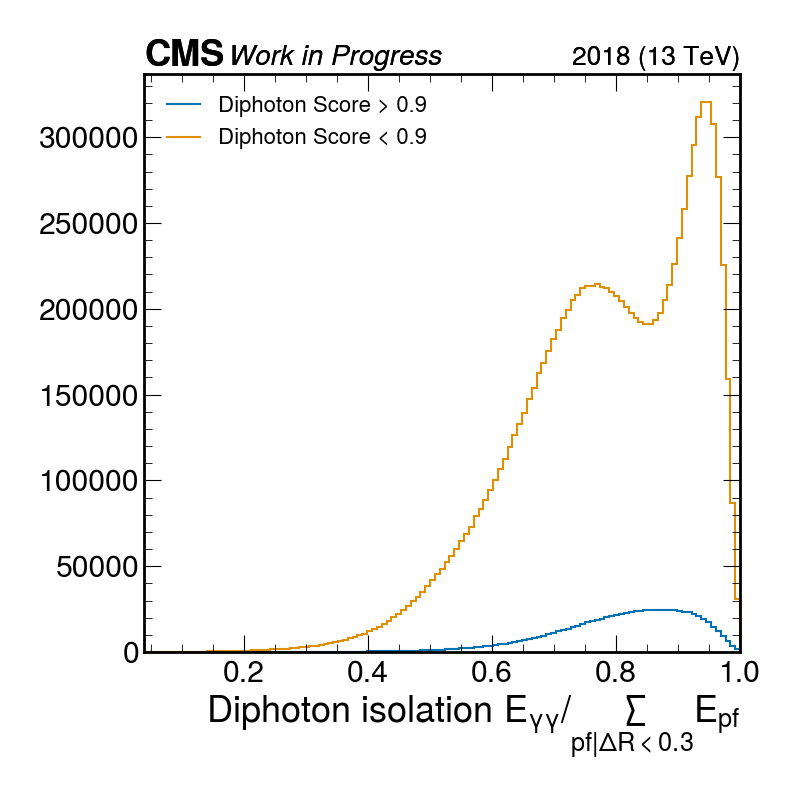

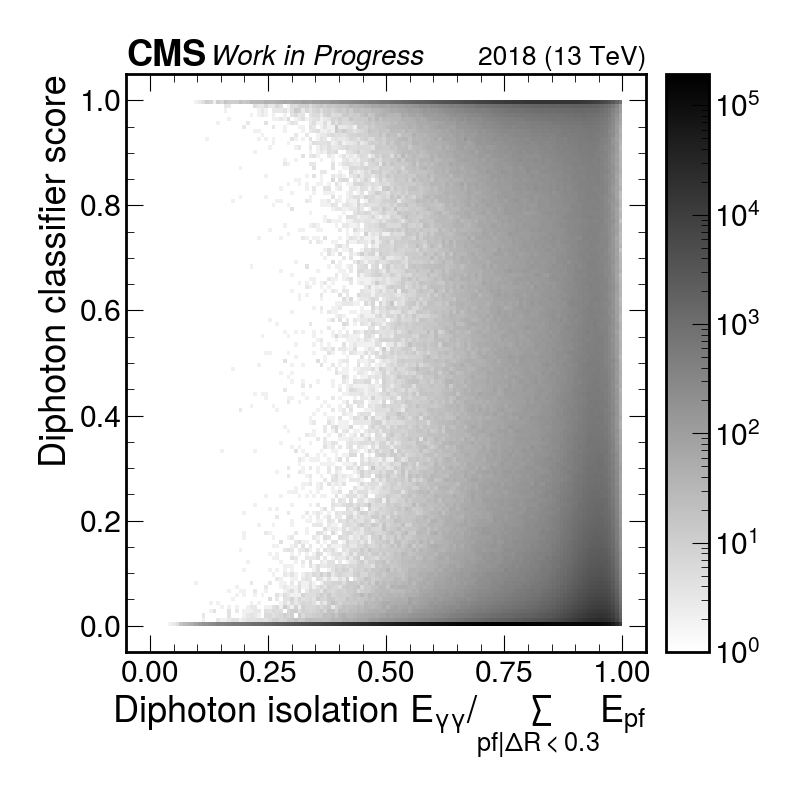

In [162]:
importlib.reload(p)
hist = hists['diphoton_isolation_score'][{'dataset':'data'}]

p.plot1ds([hist[:,0.9j:1.0j:sum], hist[:,0.0j:0.9j:sum]],
          labels=['Diphoton Score > 0.9','Diphoton Score < 0.9'],
          is_data=True)

p.plot2d(hist, setlogz=True, is_data=True, xlim=(-0.05,1.05), ylim=(-0.05,1.05))

In [55]:
importlib.reload(hgm)
importlib.reload(ruclu)
importlib.reload(obj)
hists = hgm.get_hists('signal', workflow='ruclu')

Getting histograms for signal 2018 FlatAODv3 ruclu
Histograms already exist, loading them now


Looking at the ruclu output in the signal MC. I start by adding the signal points together, in this case separating them by the rest m/E of the Radion.

In [56]:
# Testing adding signal points together
## Separate signal points by MOE
signal_point_dict = {}
for moe in si.MOES:
    signal_point_dict[moe] = {}
    signal_point_dict[moe]['signal_points'] = []
    for m_bkk in si.BKK_MASS:
        m_r = np.round(moe*(m_bkk/2), decimals=4)
        signal_point_tag = si.get_signal_filetag((m_bkk, m_r))
        signal_point_dict[moe]['signal_points'].append(signal_point_tag)

# Add signal points together
for moe, moe_dict in signal_point_dict.items():
    signal_points = moe_dict['signal_points']
    moe_dict['hist'] = hists['diphoton_genMatch'][{'dataset': signal_points}][{'dataset': sum}]

/afs/crc.nd.edu/user/a/atownse2/micromamba/envs/triphoton-env/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


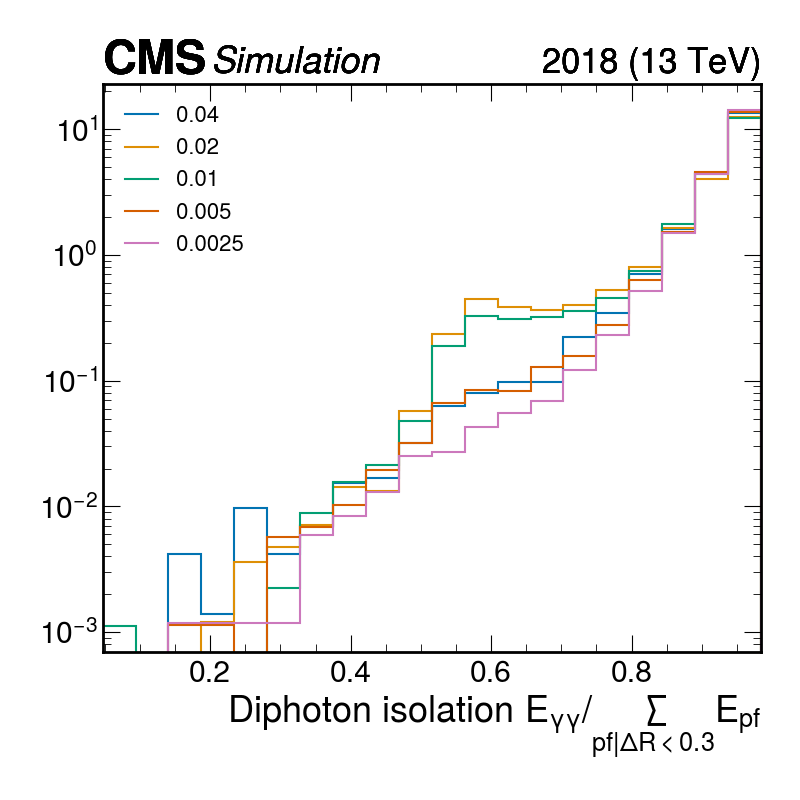

In [93]:
importlib.reload(p)

hists_in_moe = []
labels = []
for moe, moe_dict in signal_point_dict.items():
    hists_in_moe.append(moe_dict['hist'].project('diphoton_isolation')[::6j])
    labels.append(moe)

p.plot1ds(hists_in_moe, labels, density=True, setlogy=True)

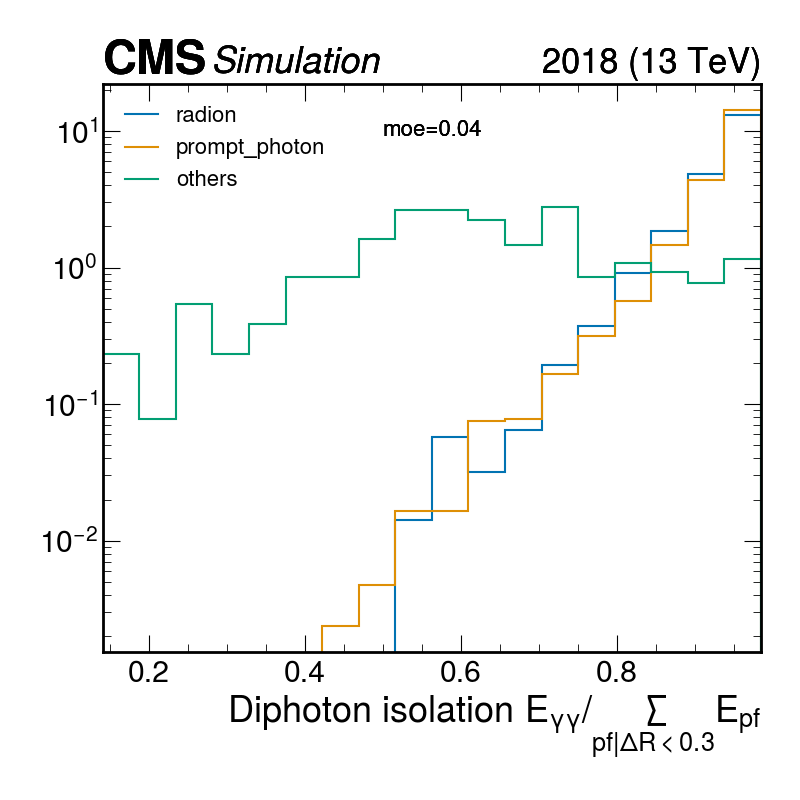

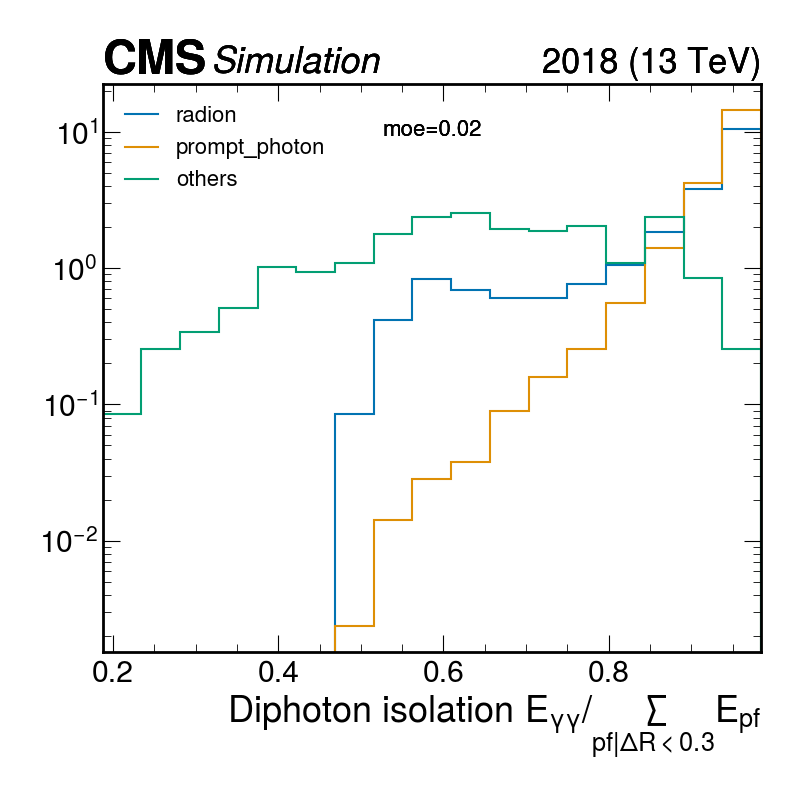

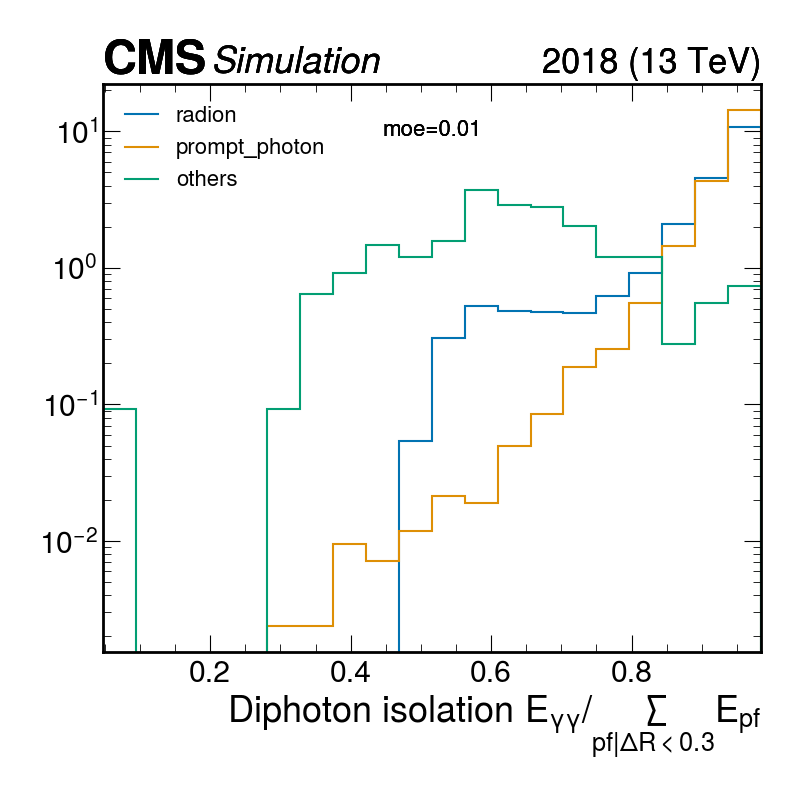

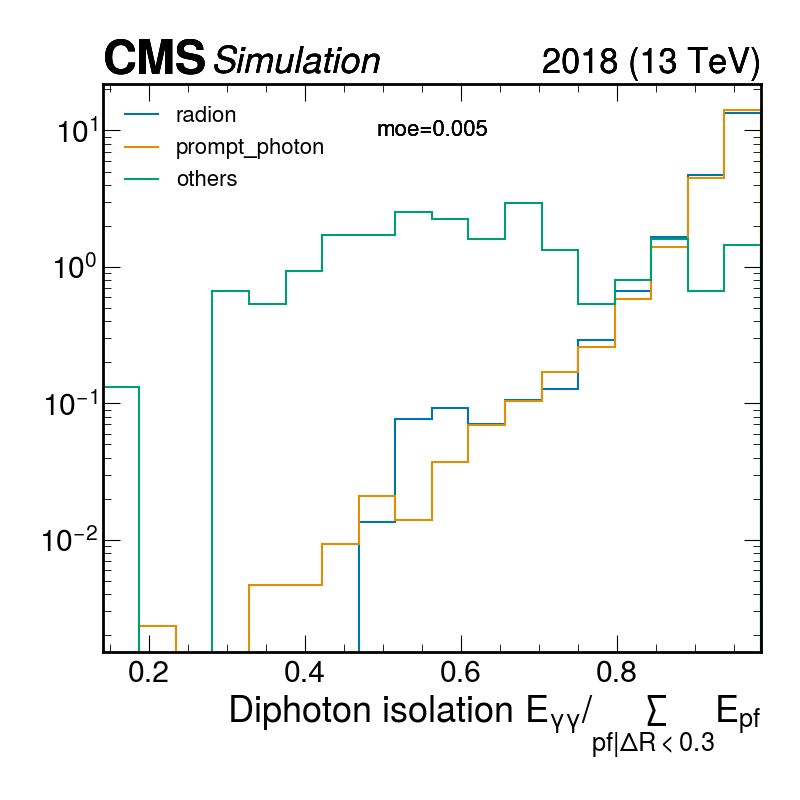

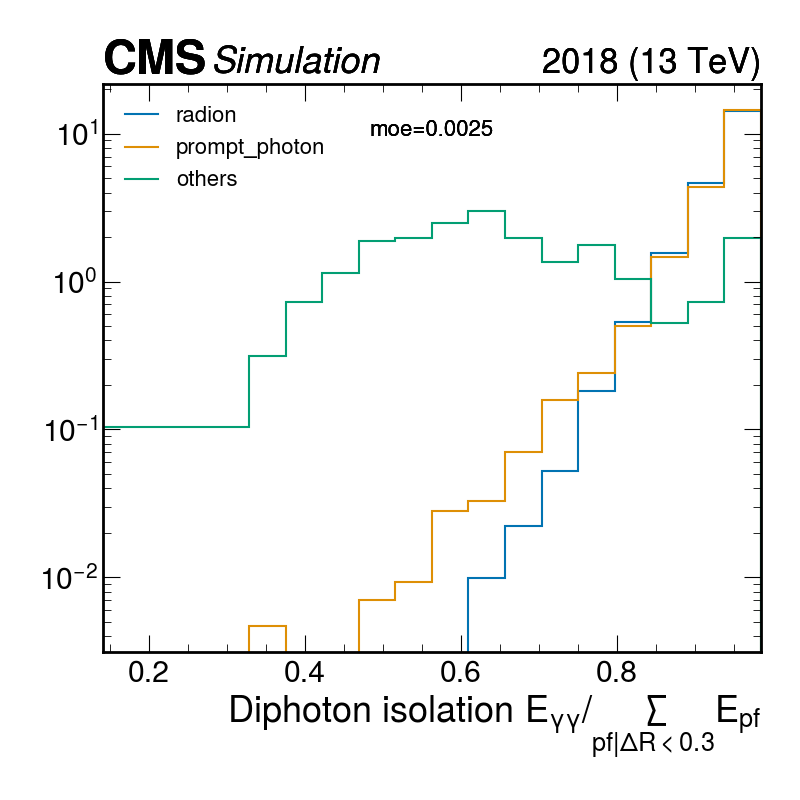

In [91]:
importlib.reload(p)

for moe, moe_dict in signal_point_dict.items():
    hists_in_genMatch = []
    labels = []
    for genMatch in ['radion', 'prompt_photon', 'others']:
        hists_in_genMatch.append(moe_dict['hist'][{'genMatch':genMatch}].project('diphoton_isolation')[::6j])
        labels.append(genMatch)

    p.plot1ds(hists_in_genMatch, labels, density=True, setlogy=True, sub_title=f'moe={moe}')
    # p.plot_stack(hists_in_genMatch, labels, setlogy=True, title=f'moe={moe}')